In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

In [4]:
obs = np.loadtxt(os.path.join('','data','ovariancancer_obs.csv'),delimiter=',')

f = open(os.path.join('','data','ovariancancer_grp.csv'), "r")
grp = f.read().split("\n") #labels dizendo se tem cancer ou não

In [6]:
obs.shape #216 pacientes, com 4000 genes sendo avaliados

(216, 4000)

In [11]:
U, S, V = np.linalg.svd(obs, full_matrices=False)
""" Cada linha de v é um auto vetor que codifica os padrões principais na representação dos genes.
    V parece que já é organizada para as primeiras linhas serem as que pegam a maior parte de variabilidade dos dados.
    V contém "auto-genes".
    Então devemos projetar isso nas 3 primeiras linhas de v"""

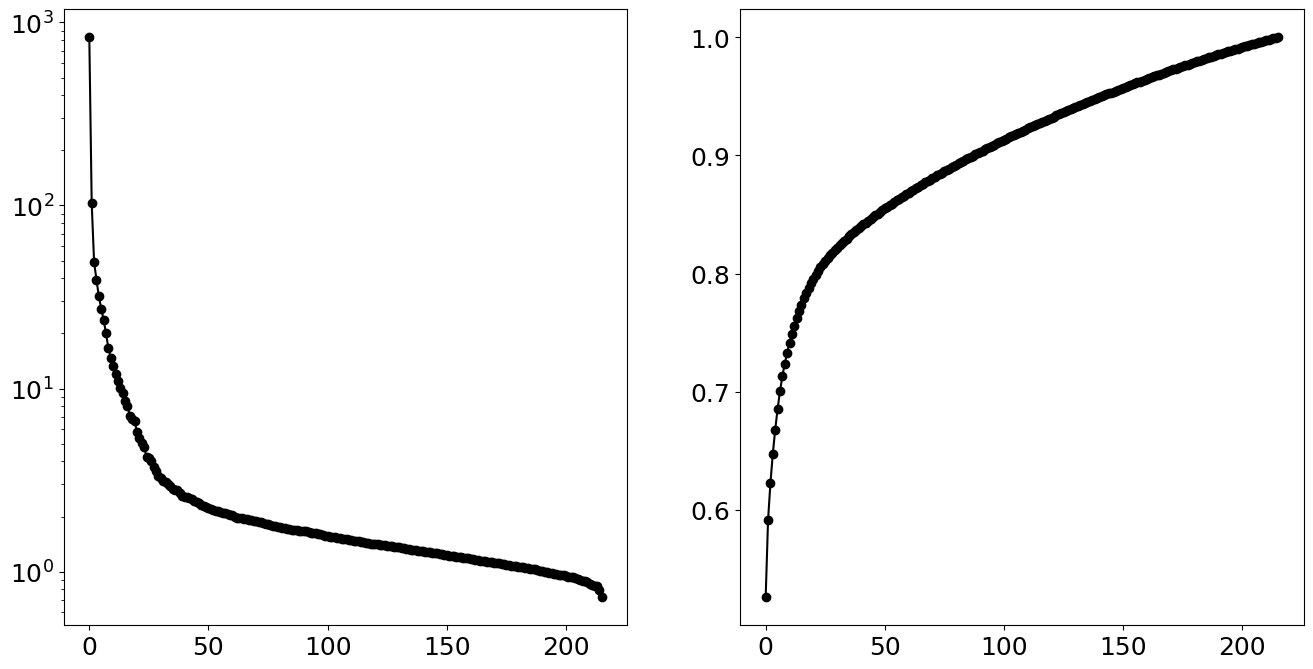

In [15]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

# os 3 primeiros singular vector já representam mais de 60% de variabilidade dos dados

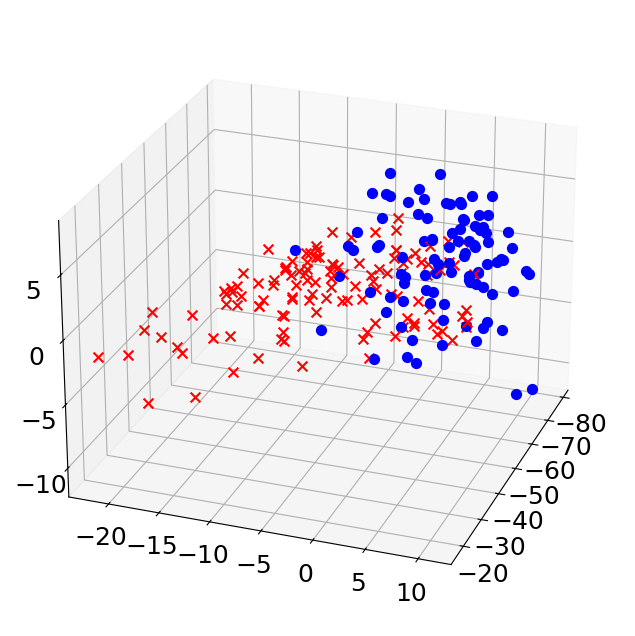

In [24]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
# ax = fig2.add_subplot(121) 

for i in range(obs.shape[0]):
    x = V[0, :] @ obs[i, :].T
    y = V[1, :] @ obs[i, :].T
    z = V[2, :] @ obs[i, :].T

    if(grp[i] == "Cancer"):
        ax.scatter(x,y,z,marker='x',color='r',s=50)
        # ax.plot(x,y, marker='x',color='r')
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)
        # ax.plot(x,y, marker='o',color='b')
        
ax.view_init(25,20)
plt.show()